Pobierz zbiór danych Fashion MNIST.

In [140]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

Wyświetl przykładowy rysunek używany do klasyfikacji:

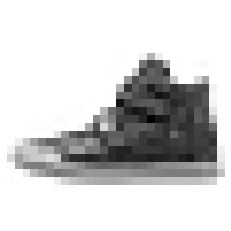

In [141]:
import matplotlib.pyplot as plt

plt.imshow(X_train[142], cmap="binary")
plt.axis('off')
plt.show()

In [142]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
               "sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[142]]

'but'

In [143]:
len(X_train)

60000

In [144]:
import numpy as np

X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255

In [145]:
from tensorflow import keras

model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300))
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(10, activation="softmax"))


In [146]:
model.summary()
keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 300)               235500    
                                                                 
 dense_32 (Dense)            (None, 100)               30100     
                                                                 
 dense_33 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


Skompiluj model, podając rzadką entropię krzyżową jako funkcję straty, SGD jako opymalizator i
dokładność jako metrykę

In [147]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [148]:
import os

root_logdir = os.path.join(os.curdir, "image_logs")


def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)


run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [149]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "my_keras_model.h5", save_best_only=True)
model.fit(X_train, y_train, epochs=20, validation_split=.1, callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6231 - accuracy: 0.7877 - val_loss: 0.5212 - val_accuracy: 0.8195
Epoch 2/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4803 - accuracy: 0.8340 - val_loss: 0.4868 - val_accuracy: 0.8298
Epoch 3/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4558 - accuracy: 0.8419 - val_loss: 0.4567 - val_accuracy: 0.8367
Epoch 4/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4417 - accuracy: 0.8468 - val_loss: 0.4337 - val_accuracy: 0.8502
Epoch 5/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4314 - accuracy: 0.8496 - val_loss: 0.4281 - val_accuracy: 0.8503
Epoch 6/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4248 - accuracy: 0.8531 - val_loss: 0.4315 - val_accuracy: 0.8493
Epoch 7/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4194 - accuracy: 0.8544 - val_loss: 0.4413 - val_accuracy:

Prediction: pulower
Confidence: 0.80010074
Truth: pulower


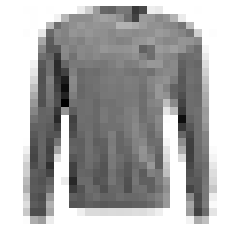

In [150]:
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

Zapisz model w pliku fashion_clf.h5:


In [151]:
model.save('fashion_clf.h5')

Pobierz zbiór danych California Housing z pakietu scikit-learn:


In [200]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [199]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42, shuffle=True)

Przeskaluj wszystkie zbiory cech, kalibrując funkcję normalizacyjną do zbioru uczącego:


In [224]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [225]:
reg_housing_1 = keras.models.Sequential()
reg_housing_1.add(keras.layers.Dense(30, input_shape=[X_train.shape[1]], activation='relu'))
reg_housing_1.add(keras.layers.Dense(1))

Skompiluj go używając błędu średniokwadratwego jako funkcji straty i SGD jako optymalizatora.

In [226]:
reg_housing_1.compile(loss='mean_squared_error', optimizer='sgd')

Przygotuj callback early stopping o cierpliwości równej 5 epok, minimalnej wartości poprawy
wynoszącej 0.01 i włączając wyświetlanie komunikatów o przerwaniu uczenia na ekranie

In [227]:
es = tf.keras.callbacks.EarlyStopping(patience=5,
                                      min_delta=0.01,
                                      verbose=1)

Podobnie jak w poprzednim ćwiczeniu, przygotuj callback Tensorboard, tak aby zbierał logi do
katalogu housing_logs.

In [228]:
root_logdir = os.path.join(os.curdir, "housing_logs")


def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)


run_logdir = get_run_logdir()
tensorboard = tf.keras.callbacks.TensorBoard(run_logdir)

In [216]:
reg_housing_1.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 30)                270       
                                                                 
 dense_45 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


Skompiluj go używając błędu średniokwadratwego jako funkcji straty i SGD jako optymalizatora.

In [229]:
history = reg_housing_1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid),
                            callbacks=[es, tensorboard])


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7856 - val_loss: 15.8957
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5486 - val_loss: 5.8224
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4637 - val_loss: 0.3910
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4383 - val_loss: 0.3881
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4095 - val_loss: 0.3851
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4029 - val_loss: 0.3774
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3943 - val_loss: 0.3851
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3914 - val_loss: 0.3848
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3993 - val_loss: 0.3952
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3892 - val_loss: 0.404

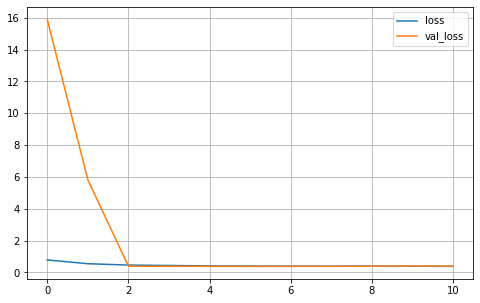

In [230]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [231]:
model.save("reg_housing_1.h5")

In [232]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', kernel_initializer='normal', kernel_regularizer="l2",
                       input_shape=[X_train.shape[1]]),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(64, activation='relu', kernel_initializer='normal', kernel_regularizer="l2"),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(1)
])

model.compile(loss='mae',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['mae'])

history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=64,
    validation_data=(X_valid, y_valid),

)

Epoch 1/150
182/182 [==============================] - 2s 4ms/step - loss: 1.3470 - mae: 1.2434 - val_loss: 0.9119 - val_mae: 0.8146
Epoch 2/150
182/182 [==============================] - 0s 3ms/step - loss: 0.8140 - mae: 0.7223 - val_loss: 0.7677 - val_mae: 0.6821
Epoch 3/150
182/182 [==============================] - 1s 3ms/step - loss: 0.6747 - mae: 0.5960 - val_loss: 0.6030 - val_mae: 0.5312
Epoch 4/150
182/182 [==============================] - 0s 3ms/step - loss: 0.6081 - mae: 0.5424 - val_loss: 0.5038 - val_mae: 0.4441
Epoch 5/150
182/182 [==============================] - 1s 3ms/step - loss: 0.5723 - mae: 0.5175 - val_loss: 0.5138 - val_mae: 0.4637
Epoch 6/150
182/182 [==============================] - 1s 3ms/step - loss: 0.5294 - mae: 0.4834 - val_loss: 0.4979 - val_mae: 0.4561
Epoch 7/150
182/182 [==============================] - 1s 3ms/step - loss: 0.5040 - mae: 0.4657 - val_loss: 0.5395 - val_mae: 0.5039
Epoch 8/150
182/182 [==============================] - 1s 3ms/step - 

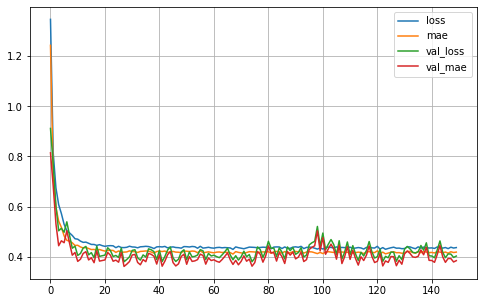

In [233]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [243]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='softmax',
                       input_shape=[X_train.shape[1]]),

    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),

    keras.layers.Dense(1)
])

model.compile(loss='mse',
              optimizer="SGD",
              metrics=['mse'])

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_valid, y_valid),

)

Epoch 1/20
182/182 [==============================] - 1s 2ms/step - loss: 1.5317 - mse: 1.5317 - val_loss: 1.0444 - val_mse: 1.0444
Epoch 2/20
182/182 [==============================] - 0s 2ms/step - loss: 0.8364 - mse: 0.8364 - val_loss: 0.6155 - val_mse: 0.6155
Epoch 3/20
182/182 [==============================] - 0s 2ms/step - loss: 0.6147 - mse: 0.6147 - val_loss: 0.5388 - val_mse: 0.5388
Epoch 4/20
182/182 [==============================] - 0s 2ms/step - loss: 0.5661 - mse: 0.5661 - val_loss: 0.4982 - val_mse: 0.4982
Epoch 5/20
182/182 [==============================] - 0s 2ms/step - loss: 0.5277 - mse: 0.5277 - val_loss: 0.4635 - val_mse: 0.4635
Epoch 6/20
182/182 [==============================] - 0s 2ms/step - loss: 0.4945 - mse: 0.4945 - val_loss: 0.4340 - val_mse: 0.4340
Epoch 7/20
182/182 [==============================] - 0s 2ms/step - loss: 0.4651 - mse: 0.4651 - val_loss: 0.4098 - val_mse: 0.4098
Epoch 8/20
182/182 [==============================] - 0s 2ms/step - loss: 0.

In [235]:
model.save("reg_housing_2.h5")

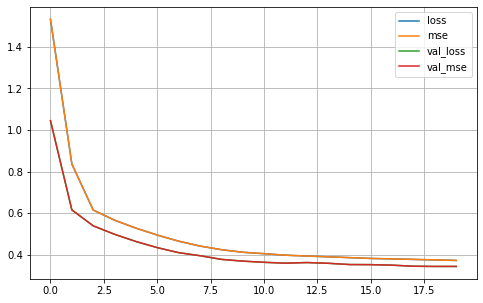

In [244]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
model.save("reg_housing_3.h5")